In [76]:
import pandas as pd
pd.__version__

from datetime import datetime

import numpy as np
np.__version__

%matplotlib inline

# Load data from CSV

In [2]:
orders_df = pd.read_csv('/Users/raphaelvannson/repos/interviewprep/jupyter/dellstore/orders.csv',
                        parse_dates=True)
orders_df.dtypes

orderid          int64
orderdate       object
customerid       int64
netamount      float64
tax            float64
totalamount    float64
dtype: object

In [3]:
orders_df.head()

,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47
4,5,2004-01-09,14771,256.00,21.12,277.12


# Lambda function

In [4]:
# used to set column type
orders_df['orderdate'] = orders_df['orderdate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
orders_df.dtypes

orderid                 int64
orderdate      datetime64[ns]
customerid              int64
netamount             float64
tax                   float64
totalamount           float64
dtype: object

# Get rows by index

In [5]:
orders_df[2:3]

,orderid,orderdate,customerid,netamount,tax,totalamount
2,3,2004-01-17,15399,160.1,13.21,173.31


In [6]:
orders_df[0:4]

,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47


# Sort

In [81]:
orders_df.sort_values(by = ['orderdate', 'totalamount'], ascending = False).head()

,orderid,orderdate,customerid,netamount,tax,totalamount
11949,11950,2004-12-31,15356,381.83,31.50,413.33
11058,11059,2004-12-31,5081,364.52,30.07,394.59
11733,11734,2004-12-31,2397,358.59,29.58,388.17
11871,11872,2004-12-31,1990,356.73,29.43,386.16
11735,11736,2004-12-31,13454,355.24,29.31,384.55


In [80]:
orders_df.sort_values(by = ['orderdate', 'totalamount'], ascending = False).tail()

,orderid,orderdate,customerid,netamount,tax,totalamount
269,270,2004-01-01,3521,31.86,2.63,34.49
278,279,2004-01-01,14331,9.04,0.75,9.79
611,612,2004-01-01,14267,7.16,0.59,7.75
596,597,2004-01-01,8395,6.10,0.50,6.60
512,513,2004-01-01,2569,0.59,0.05,0.64


# Filter rows

## Example 1

In [20]:
# 10 Orders with the smallest customerid
orders_df \
.sort_values('customerid') \
.head(10)

,orderid,orderdate,customerid,netamount,tax,totalamount
10676,10677,2004-11-10,2,5.08,0.42,5.50
2336,2337,2004-03-11,3,39.06,3.22,42.28
9076,9077,2004-10-21,6,323.30,26.67,349.97
6238,6239,2004-07-06,7,341.44,28.17,369.61
1186,1187,2004-02-23,11,285.39,23.54,308.93
3709,3710,2004-04-20,12,350.87,28.95,379.82
378,379,2004-01-14,13,227.45,18.76,246.21
9446,9447,2004-10-10,13,83.31,6.87,90.18
3074,3075,2004-04-10,15,33.63,2.77,36.40
5018,5019,2004-06-30,19,256.30,21.14,277.44


In [7]:
orders_df[orders_df.customerid < 10]

,orderid,orderdate,customerid,netamount,tax,totalamount
2336,2337,2004-03-11,3,39.06,3.22,42.28
6238,6239,2004-07-06,7,341.44,28.17,369.61
9076,9077,2004-10-21,6,323.30,26.67,349.97
10676,10677,2004-11-10,2,5.08,0.42,5.50


In [35]:
orders_df.query('customerid < 10')

,orderid,orderdate,customerid,netamount,tax,totalamount
2336,2337,2004-03-11,3,39.06,3.22,42.28
6238,6239,2004-07-06,7,341.44,28.17,369.61
9076,9077,2004-10-21,6,323.30,26.67,349.97
10676,10677,2004-11-10,2,5.08,0.42,5.50


## Example 2

In [19]:
orders_df[(orders_df.orderdate <= datetime.strptime('2004-01-02', '%Y-%m-%d')) & (orders_df.totalamount < 50)]

,orderid,orderdate,customerid,netamount,tax,totalamount
267,268,2004-01-02,19232,26.67,2.20,28.87
269,270,2004-01-01,3521,31.86,2.63,34.49
278,279,2004-01-01,14331,9.04,0.75,9.79
512,513,2004-01-01,2569,0.59,0.05,0.64
562,563,2004-01-01,4075,44.69,3.69,48.38
596,597,2004-01-01,8395,6.10,0.50,6.60
611,612,2004-01-01,14267,7.16,0.59,7.75
653,654,2004-01-02,15212,45.10,3.72,48.82
675,676,2004-01-02,11451,26.97,2.23,29.20
926,927,2004-01-02,16362,26.61,2.20,28.81


In [37]:
orders_df \
.query("(orderdate <= datetime.strptime('2004-01-02', '%Y-%m-%d')) & (totalamount < 50)")

,orderid,orderdate,customerid,netamount,tax,totalamount
267,268,2004-01-02,19232,26.67,2.20,28.87
269,270,2004-01-01,3521,31.86,2.63,34.49
278,279,2004-01-01,14331,9.04,0.75,9.79
512,513,2004-01-01,2569,0.59,0.05,0.64
562,563,2004-01-01,4075,44.69,3.69,48.38
596,597,2004-01-01,8395,6.10,0.50,6.60
611,612,2004-01-01,14267,7.16,0.59,7.75
653,654,2004-01-02,15212,45.10,3.72,48.82
675,676,2004-01-02,11451,26.97,2.23,29.20
926,927,2004-01-02,16362,26.61,2.20,28.81


# Aggregation

In [11]:
def ninetyth_percentile(x):
    return(np.percentile(x, 90))

In [12]:
def ninetyfift_percentile(x):
    return(np.percentile(x, 95))

In [13]:
def ninetynineth_percentile(x):
    return(np.percentile(x, 99))

In [14]:
ninetyfift_percentile([1, 2, 3, 4, 5, 6, 6, 7])

6.6499999999999995

In [78]:
stats_df = orders_df \
.groupby(['orderdate'])['netamount', 'totalamount'] \
.agg(['count', 'sum', 'min', 'max', 'mean',
      ninetyth_percentile, ninetyfift_percentile, ninetynineth_percentile])

stats_df.head()

netamount                                                          \
               count      sum    min     max        mean ninetyth_percentile   
orderdate                                                                      
2004-01-01        32  4428.15   0.59  397.26  138.379688             357.038   
2004-01-02        28  4726.37  26.61  391.59  168.798929             314.307   
2004-01-03        31  6636.10  14.22  397.42  214.067742             377.560   
2004-01-04        34  7554.76  10.45  395.35  222.198824             360.969   
2004-01-05        39  9191.49   7.78  396.23  235.679231             357.742   

                                                         totalamount           \
           ninetyfift_percentile ninetynineth_percentile       count      sum   
orderdate                                                                       
2004-01-01              394.0785                396.8074          32  4793.47   
2004-01-02              359.5675                387.2862          28  5116.28   
2004-01-03              386.4350                394.7950          31  7183.60   
2004-01-04              377.2230                390.0502          34  8178.03   
2004-01-05              377.0950                395.0976          39  9949.77   

                                                           \
              min     max        mean ninetyth_percentile   
orderdate                                                   
2004-01-01   0.64  430.03  149.795937             386.490   
2004-01-02  28.81  423.90  182.724286             340.240   
2004-01-03  15.39  430.21  231.729032             408.710   
2004-01-04  11.31  427.97  240.530294             390.749   
2004-01-05   8.42  428.92  255.122308             387.256   

                                                          
           ninetyfift_percentile ninetynineth_percentile  
orderdate                                                 
2004-01-01               426.591                429.5402  
2004-01-02               389.231                419.2398  
2004-01-03               418.320                427.3690  
2004-01-04               408.344                422.2313  
2004-01-05               408.203                427.6926

In [22]:
stats_df.columns

MultiIndex(levels=[['netamount', 'totalamount'], ['count', 'sum', 'min', 'max', 'mean', 'ninetyth_percentile', 'ninetyfift_percentile', 'ninetynineth_percentile']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]])

In [32]:
stats_df[[('netamount', 'sum'), ('totalamount', 'sum'), ('totalamount', 'max')]]. \
sort_values(by = ('netamount', 'sum'), ascending = True) \
.head(10)

netamount totalamount        
                 sum         sum     max
orderdate                               
2004-06-03   2462.56     2665.73  350.43
2004-04-19   3146.41     3406.01  423.53
2004-05-17   3239.32     3506.56  421.80
2004-12-11   3518.66     3808.96  386.91
2004-01-19   3694.39     3999.17  422.95
2004-07-25   3713.77     4020.16  378.75
2004-10-16   3857.89     4176.19  421.80
2004-03-12   4001.80     4331.96  429.22
2004-09-01   4004.55     4334.95  423.85
2004-06-16   4025.41     4357.51  425.33

# Window functions

https://blog.modeanalytics.com/bridge-the-gap-window-functions/

In [104]:
daily_amount_sr = orders_df \
.sort_values('orderdate') \
.groupby('orderdate')['totalamount'] \
.agg('sum') \
.rename('daily_sales_amount')

df = pd.DataFrame(daily_amount_sr)
df.head()

,daily_sales_amount
orderdate,
2004-01-01,4793.47
2004-01-02,5116.28
2004-01-03,7183.60
2004-01-04,8178.03
2004-01-05,9949.77


In [105]:
df['daily_sales_cum_mean'] = df.daily_sales_amount.expanding().mean()
df.head(10)

,daily_sales_amount,daily_sales_cum_mean
orderdate,,
2004-01-01,4793.47,4793.470000
2004-01-02,5116.28,4954.875000
2004-01-03,7183.60,5697.783333
2004-01-04,8178.03,6317.845000
2004-01-05,9949.77,7044.230000
2004-01-06,7230.18,7075.221667
2004-01-07,7883.86,7190.741429
2004-01-08,9078.51,7426.712500
2004-01-09,5491.51,7211.690000


In [106]:
df['daily_sales_rolling_mean'] = df.daily_sales_amount.rolling(5).mean()
df.head(10)

,daily_sales_amount,daily_sales_cum_mean,daily_sales_rolling_mean
orderdate,,,
2004-01-01,4793.47,4793.470000,NaN
2004-01-02,5116.28,4954.875000,NaN
2004-01-03,7183.60,5697.783333,NaN
2004-01-04,8178.03,6317.845000,NaN
2004-01-05,9949.77,7044.230000,7044.230
2004-01-06,7230.18,7075.221667,7531.572
2004-01-07,7883.86,7190.741429,8085.088
2004-01-08,9078.51,7426.712500,8464.070
2004-01-09,5491.51,7211.690000,7926.766


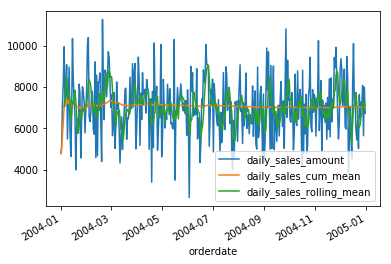

In [107]:
df.plot()

# Joins